In [25]:
import pandas as pd
data = pd.read_csv("wildfires.txt", sep="\t")
print(data)

       fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0     no     2015    28        59       0.0          8.06           3.47    1   
1     no     2010    30        61       1.3          8.17           4.03    2   
2     no     2009    26        83      13.1          8.08           3.59    3   
3     no     2017    25        87       2.5          7.18           2.42    4   
4     no     2014    28        77       0.0         14.98           4.63    5   
..      ...   ...   ...       ...       ...           ...            ...  ...   
199  yes     2017    31        67       0.0         45.15          17.89   26   
200   no     2017    29        89       4.4          8.74           6.52   27   
201   no     2009    27        88       0.5          8.87           3.71   28   
202   no     2016    25        56       0.1         15.54           6.10   29   
203  no      2012    24        62       0.2         16.72           5.75   30   

     month  wind_speed  
0 

In [26]:
del data["year"]
del data["day"]
del data["month"]

In [27]:
dependent = data.values[:,0]
independent = data.values[:,1:9]

In [28]:
for var in range(len(dependent)):
    dependent[var] = dependent[var].replace(" ", "")
print(dependent)

['no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'no'
 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'no' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no'

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dependent = le.fit_transform(dependent)
dependent

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    independent, dependent, test_size=0.3, random_state=0)

In [31]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np

In [32]:
### Defining Multi-Layer Percepptron
## 1-Hidden-Layer Perceptron

In [33]:
learningRate = 0.0001
bias = 1
feature_length = len(independent[0])

In [34]:
import random

# Inital Weights
weight_layer = [[random.random() for i in range (feature_length + 1)] for j in range (round(feature_length/2))]
weight_final = [random.random() for i in range (round(feature_length/2))]

In [35]:
hx1 = []

In [36]:
def hidden_Calculation1(input):
    for i in range(len(weight_layer)):
        xi = 0
        for j in range(len(input)):
            xi += input[j] * weight_layer[i][j]
        if (len(hx1) < len(weight_layer)):
            hx1.append(xi)
        else:
            hx1[i] = xi

In [37]:
def y_Calculation():
    xi = 0
    for i in range(len(weight_final)):
        xi += hx1[i] * weight_final[i]
    return xi

In [38]:
def guess_value(y_val):
    if y_val > 0:
        return 1
    else:
        return 0

In [39]:
def backpropagation(error, inputs):
    for i in range(len(weight_layer)):
        for j in range(feature_length):
            weight_layer[i][j] += learningRate * error * inputs[j]
    for i in range(len(weight_final)):
        weight_final[i] += learningRate * error * hx1[i]

In [40]:
def train(train_inputs, desired):
    train_inputs = np.array(train_inputs)
    train_inputs = np.append(train_inputs,bias)
    hidden_Calculation1(train_inputs)
    y = y_Calculation()
    guess = guess_value(y)
    error = desired - guess
    if error != 0:
        backpropagation(error, train_inputs)

In [41]:
def test(test_inputs):
    test_inputs = np.array(test_inputs)
    test_inputs = np.append(test_inputs,bias)
    hidden_Calculation1(test_inputs)
    y = y_Calculation()
    guess = guess_value(y)
    return guess

In [42]:
accuracies = []
target_names= ["no", "yes"]
test_len= len(X_test)
for i in range(5):
    print(i+1)
    print("i*round(test_len/5)", i*round(test_len/5), "(i*round(test_len/5))+ round(test_len/5)", (i*round(test_len/5))+ round(test_len/5))
    result=[]
    X_val = X_train[i*round(test_len/5):(i*round(test_len/5))+ round(test_len/5),:]
    
    X_train_stack = X_train
    X_train_stack = np.delete(X_train_stack,list(range(i*round(test_len/5),(i*round(test_len/5))+ round(test_len/5))), axis=0)

    
    y_val = y_train[i*round(test_len/5):(i*round(test_len/5))+ round(test_len/5)]
    
    y_train_stack = y_train
    y_train_stack= np.delete(y_train_stack,list(range(i*round(test_len/5),(i*round(test_len/5)+ round(test_len/5)))))
    

    print("X_train_stack", len(X_train_stack))
    for key in range(len(X_train_stack)):
        train(X_train_stack[key], y_train_stack[key])
    for key in range(len(X_val)):
        result.append(test(X_val[key]))
    print(result)
    accuracy = accuracy_score(y_val, result)
    accuracies.append(accuracy)
    classification_report = metrics.classification_report(y_val, result, target_names=target_names)
    print("Accuracy: ", accuracy)
    print("Classification Report: ")
    print(classification_report)
    print("-------------------")

1
i*round(test_len/5) 0 (i*round(test_len/5))+ round(test_len/5) 12
X_train_stack 130
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy:  0.5833333333333334
Classification Report: 
              precision    recall  f1-score   support

          no       0.00      0.00      0.00         5
         yes       0.58      1.00      0.74         7

    accuracy                           0.58        12
   macro avg       0.29      0.50      0.37        12
weighted avg       0.34      0.58      0.43        12

-------------------
2
i*round(test_len/5) 12 (i*round(test_len/5))+ round(test_len/5) 24
X_train_stack 130
[1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]
Accuracy:  0.75
Classification Report: 
              precision    recall  f1-score   support

          no       0.57      1.00      0.73         4
         yes       1.00      0.62      0.77         8

    accuracy                           0.75        12
   macro avg       0.79      0.81      0.75        12
weighted avg       0.86      0.75      0

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
results = []
target_names= ["no", "yes"]
for key in range(len(X_test)):
        result = test(X_test[key])
        results.append(result)
accuracy = accuracy_score(y_test, results)
print("accuracy", accuracy)
classification_report = metrics.classification_report(y_test, results, target_names=target_names)
print("classification_report")
print(classification_report)

accuracy 0.7580645161290323
classification_report
              precision    recall  f1-score   support

          no       0.69      0.81      0.75        27
         yes       0.83      0.71      0.77        35

    accuracy                           0.76        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.77      0.76      0.76        62



In [44]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

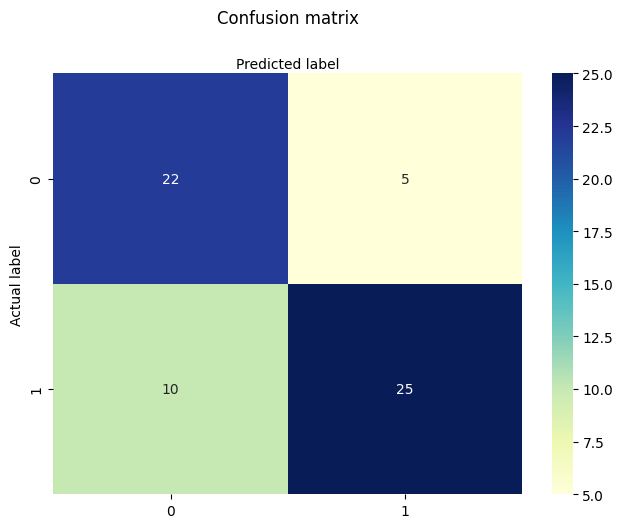

In [45]:
cnf_matrix = metrics.confusion_matrix(y_test, results)
fig, ax = plt.subplots()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names)
plt.yticks(tick_marks, target_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

AUC: 0.765


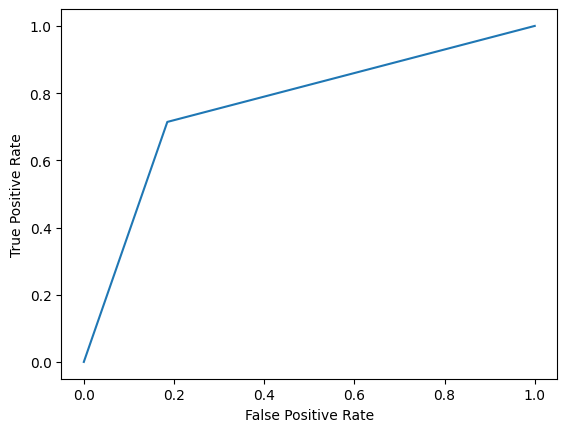

In [46]:
fpr, tpr, _ = metrics.roc_curve(y_test,  results)
# calculate AUC
auc = metrics.roc_auc_score(y_test, results)
print('AUC: %.3f' % auc)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


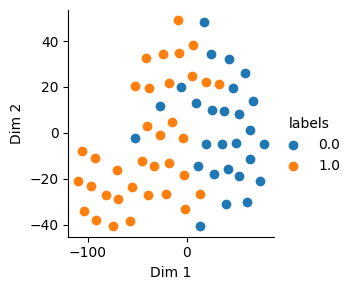

In [47]:
model = TSNE(n_components = 2, random_state=2)
tsne_data_test = model.fit_transform(X_test)
tsne_data_test = np.vstack((tsne_data_test.T, y_test)).T

tsne_df_test = pd.DataFrame(data=tsne_data_test, columns=("Dim 1", "Dim 2", "labels"))

sns.FacetGrid(tsne_df_test, hue="labels").map(plt.scatter, "Dim 1", "Dim 2").add_legend()
plt.show()

/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


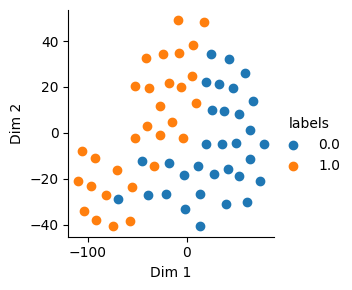

In [48]:
tsne_data_result = model.fit_transform(X_test)
tsne_data_result = np.vstack((tsne_data_result.T, results)).T

tsne_df_result = pd.DataFrame(data=tsne_data_result, columns=("Dim 1", "Dim 2", "labels"))

sns.FacetGrid(tsne_df_result, hue="labels").map(plt.scatter, "Dim 1", "Dim 2").add_legend()
plt.show()